In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import os

In [2]:
patt_label = re.compile(r'"(.*)"')
plt.rcParams.update({
    "font.family": 'STIXGeneral',
    "font.size": 13,
    "mathtext.fontset":'stix',
    "axes.unicode_minus": False,
})

In [3]:
EDR_DIR = 'npt.edr'
os.environ['GMX_MAXBACKUP'] = '-1'
energies = ['Potential', 'Temperature', 'Pressure', 'Density', 
            'Enthalpy', 'Conserved-En.']

units = []
legends = []
data = []

for i, idx in enumerate(energies):
    os.system(f'echo {idx} | gmx energy -f {EDR_DIR}')
    data.append(np.loadtxt('energy.xvg', comments=['#', '@']).T)

    with open(r'energy.xvg') as f:
        for line in f.readlines():
            match line[0]:
                case '#': continue
                case '@':
                    if label := patt_label.search(line):
                        line_split = line.split()
                        if 'yaxis' in line_split:
                            units.append(label.group(1))
                        elif 'legend' in line_split:
                            legends.append(label.group(1))
                case _:
                    break


                       :-) GROMACS - gmx energy, 2023 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/crema/gromacs/benzoic-acid-extraction
Command line:
  gmx energy -f npt.edr

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Ryckaert-Bell.   4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Conserved-En.   15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Box-X           20  Box-Y         
 21  Box-Z           22  Volume          23  Density         24  pV            
 25 


Statistics over 15000001 steps [ 0.0000 through 30000.0000 ps ], 1 data sets
All statistics are over 150001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -3312.55        560    9998.23    3234.67  (kJ/mol)

Statistics over 15000001 steps [ 0.0000 through 30000.0000 ps ], 1 data sets
All statistics are over 150001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 322.648       0.53    10.8561    3.14928  (K)

Statistics over 15000001 steps [ 0.0000 through 30000.0000 ps ], 1 data sets
All statistics are over 150001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                   0.140549       0.58   

Last energy frame read 15000 time 30000.000         

GROMACS reminds you: "Do You Have Sex Maniacs or Schizophrenics or Astrophysicists in Your Family?" (Gogol Bordello)

                       :-) GROMACS - gmx energy, 2023 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/crema/gromacs/benzoic-acid-extraction
Command line:
  gmx energy -f npt.edr

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Ryckaert-Bell.   4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Conserved-En.   15  Temperature     16  Pres.-D

已读取数据：['Potential', 'Temperature', 'Pressure', 'Density', 'Enthalpy', 'Conserved En.']


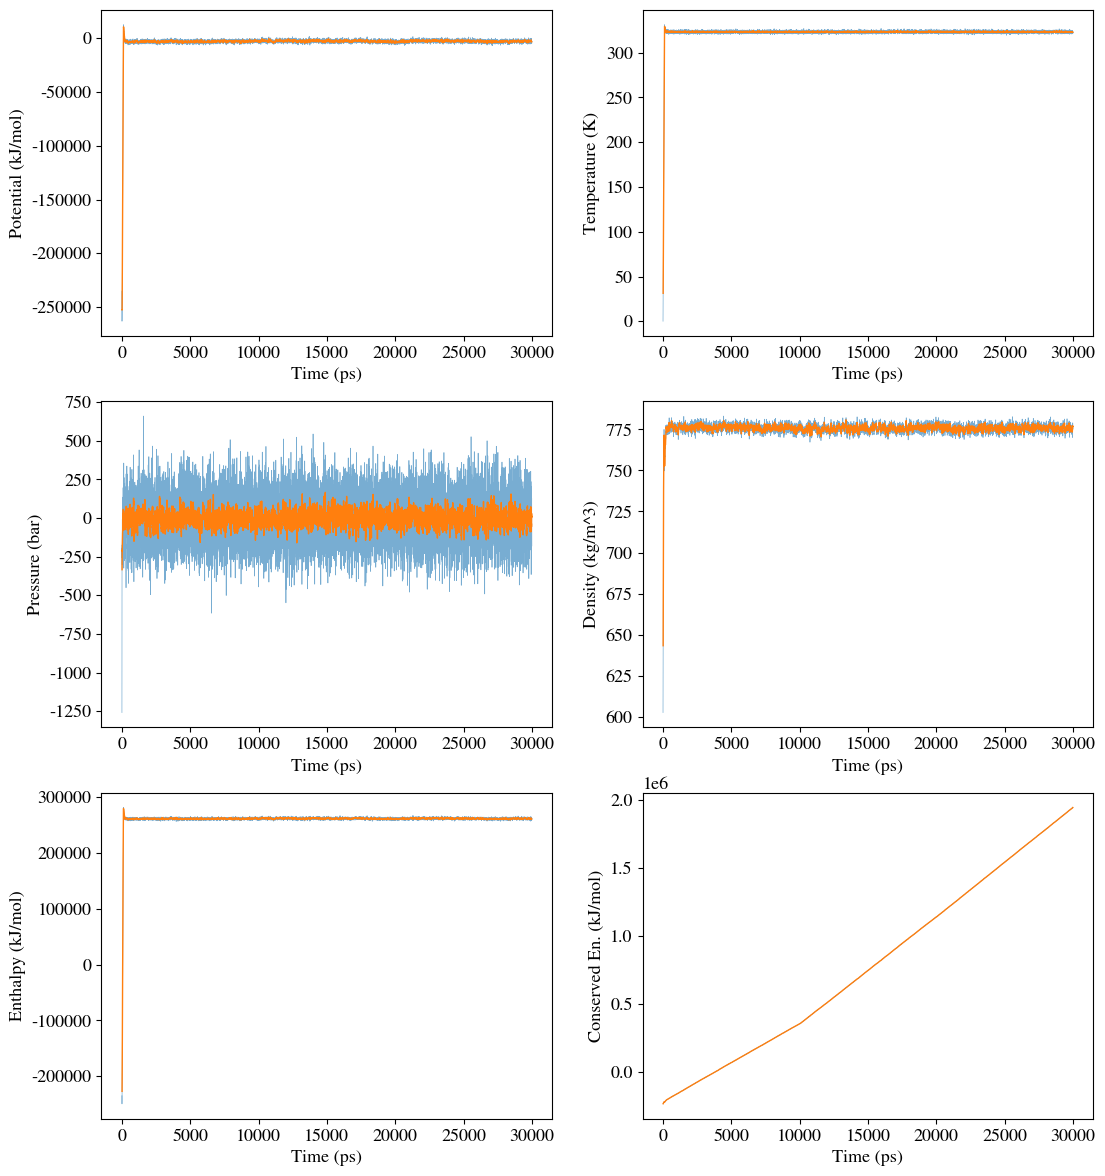

In [4]:
print(f'已读取数据：{legends}')

nplots = len(legends)
rows = math.ceil(nplots / 2)
fig, axes = plt.subplots(rows, 2, figsize=[12.8, 4.8 * rows], dpi=100, squeeze=False)
if nplots < 2 * rows:
    axes[rows - 1, 1].axis(False)

k = 11  # an odd number for calculating the moving mean

for idx, (legend, unit, series) in enumerate(zip(legends, units, data)):
    axis = axes[idx // 2, idx % 2]
    axis.plot(series[0], series[1], linewidth=0.5, alpha=0.6)
    movmean = np.convolve(series[1], np.ones(k), 'valid') / k
    axis.plot(np.split(series[0], [k // 2, -(k // 2)])[1], movmean, linewidth=1)
    
    axis.set_xlabel('Time (ps)')
    axis.set_ylabel(f"{legend} {unit}")
